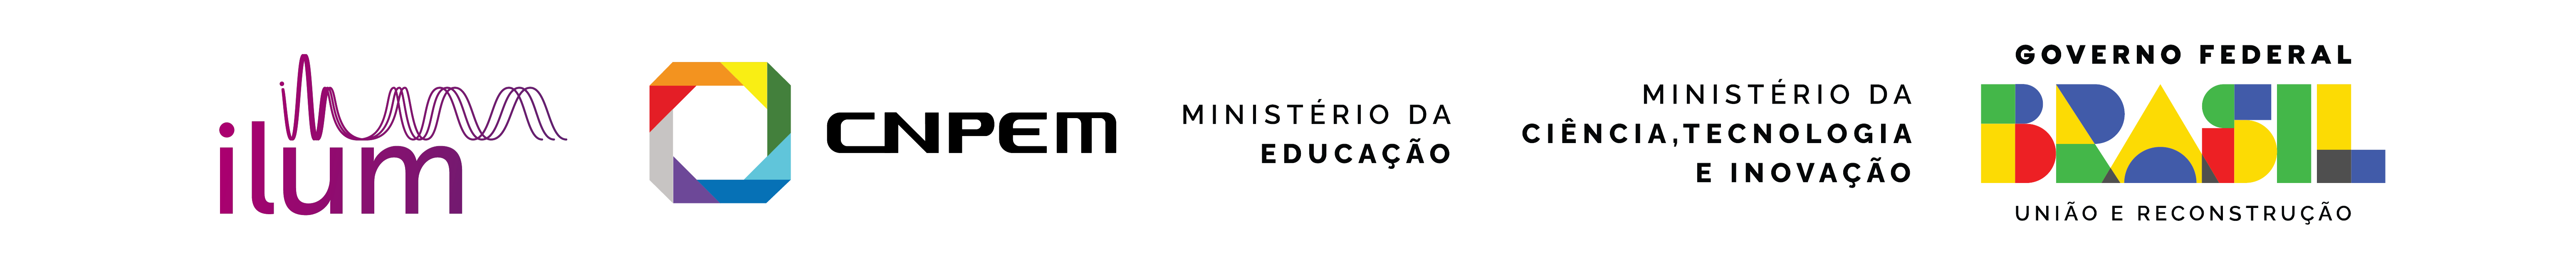

# <center> ❄️ Geração de Fractais ❄️ </center>

<center>
Yasmin Barbosa Shimizu <br>
<b> Prof.: </b> Vinícius F. Wasques <br>
<b> Espaços Normados </b>
    </center>
    
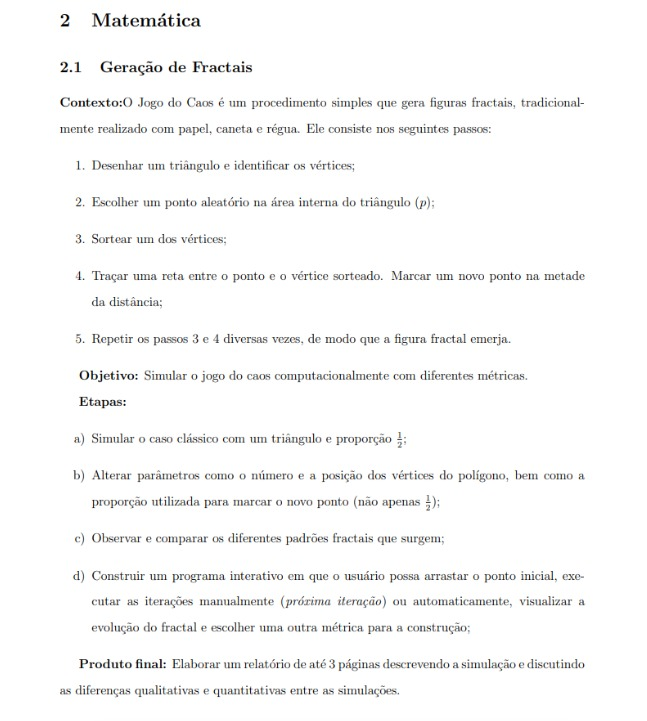

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def aplica_funcao(x_data, f_expr):
    """
    Avalia a função f(x), definida por uma string, nos pontos de x_data e retorna os resultados como vetor coluna.

    Args:
        x_data (array-like): vetor coluna (n x 1) contendo os valores de entrada x₀ nos quais a função será avaliada.
        f_expr (str): Expressão representando a função f(x) interpretada via eval, por exemplo: "x**2 + 3*x - 1" ou "math.cos".
        
    Returns:
        results_f (np.ndarray): vetor coluna (n x 1) contendo os valores f(x₀) para cada x₀ em x_data.
    """
    
    # Criar função f(x) a partir da expressão f_expr
    f = lambda x: eval(f_expr)
    
    # Lista para armazenar os resultados de f(x0), x0 em x_data
    results_f = []
    
    # Itera sobre os valores em x_data e calcula f(x)
    for x in x_data:
        results_f.append(f(x))
        
    # Transforma results_f em uma matriz coluna com cada valor f(x0), x0 em x_data
    results_f = np.array(results_f)
    
    results_f = results_f.reshape(-1,1)
    
    return results_f

In [3]:
def aresta(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    if x2 == x1:  # reta vertical
        return f"{x1}"
    else:
        m = (y2 - y1)/(x2 - x1)
        b = f"+ {y1} - {m}*{x1}"
        return f"{m}*x" + b
    
def arestas_tri_eq(vertices):
    v1,v2,v3 = vertices
    a1 = aresta(v1,v2)
    a2 = aresta(v2,v3)
    a3 = aresta(v3,v1)
    
    arestas = a1,a2,a3
    
    return arestas

In [4]:
def plota_triangulo(vertices=None, arestas = None, ax=None):
    if vertices is None:
        v1 = (0,0)
        v2 = (1,0)
        v3 = (1/2, 3**(1/2)/2)
        vertices = [v1,v2,v3]
    
    if arestas is None:
        arestas = arestas_tri_eq(vertices)

    v1,v2,v3 = vertices
    
    vx = [v[0] for v in [v1, v2, v3]]  
    vy = [v[1] for v in [v1, v2, v3]]
    
    x1 = np.arange(v1[0],v2[0]+0.0125,0.0125)
    x2 = np.arange(v3[0],v2[0]+0.0125,0.0125)
    x3 = np.arange(v1[0],v3[0]+0.0125,0.0125)

    y1 = aplica_funcao(x1, a1)
    y2 = aplica_funcao(x2, a2)
    y3 = aplica_funcao(x3, a3)
    
    if ax is None:
        plt.scatter(vx, vy, color="black")
        plt.plot(x1,y1, color="black", linestyle = "--", alpha=0.25)
        plt.plot(x2,y2, color="black", linestyle = "--", alpha=0.25)
        plt.plot(x3,y3, color="black", linestyle = "--", alpha=0.25)
    else:
        ax.scatter(vx, vy, color="black")
        ax.plot(x1,y1, color="black", linestyle = "--", alpha=0.25)
        ax.plot(x2,y2, color="black", linestyle = "--", alpha=0.25)
        ax.plot(x3,y3, color="black", linestyle = "--", alpha=0.25)

In [5]:
def sorteia_ponto_inicial(arestas = None):
    
    if arestas is None:
        v1 = (0,0)
        v2 = (1,0)
        v3 = (1/2, 3**(1/2)/2)

        arestas = arestas_tri_eq([v1,v2,v3])

    a1,a2,a3 = arestas
        
    x  = round(random.uniform(0, 1),3)
    
    if x <= 0.5:
        lim_s = aplica_funcao([x], a3)[0]
        lim_s = lim_s[0]
    else:
        lim_s = aplica_funcao([x], a2)[0]
        lim_s = lim_s[0]
    
    lim_i = aplica_funcao([x], a1)[0]
    lim_i = lim_i[0]
    
    y = round(random.uniform(lim_i, lim_s), 3)
    
    p = (x, y)
    
    return p

In [6]:
def metrica_euclidiana (x, y):
    """Recebe dois pontos N-dimensionais e retorna a distância euclidiana entre eles.
    x, y: objetos numpy com as coordenadas do ponto. Exemplo: x = [x_1, x_2, ..., x_n]"""

    d2 = ((x[0] - y[0])**2) + ((x[1] - y[1])**2)
    d  = np.sqrt(d2)
        
    return d


def metrica_maximo (x, y):
    """Recebe dois pontos N-dimensionais e retorna a distância da métrica do máximo entre eles.
    x, y: objetos numpy com as coordenadas do ponto. Exemplo: x = [x_1, x_2, ..., x_n]"""

    d = max(abs(x[0] - y[0]), abs(x[1] - y[1]))

    return d


def metrica_soma (x, y):
    """Recebe dois pontos N-dimensionais e retorna a distância da métrica da soma entre eles.
    x, y: objetos numpy com as coordenadas do ponto. Exemplo: x = [x_1, x_2, ..., x_n]"""

    d = abs(x[0] - y[0])+ abs(x[1] - y[1])
        
    return d

def metrica_zero_um (x, y):
    """Recebe dois pontos N-dimensionais e retorna a distância da métrica da zero-um entre eles.
    x, y: objetos numpy com as coordenadas do ponto. Exemplo: x = [x_1, x_2, ..., x_n]"""
    
    if np.array_equal(x, y):
        return 0
    
    return 1

## Métrica do Máximo

In [7]:
def sorteia_vertice(vertices = None):
    if vertices is None:
        v1 = (0,0)
        v2 = (1,0)
        v3 = (1/2, 3**(1/2)/2)
        vertices = [v1,v2,v3]
        
    v = random.choice(vertices)
    return v


def calcula_ponto_central(p, v, metr = metrica_maximo):
    p1,p2 = p
    v1,v2 = v
        
    d = metr(p,v)  
    
    if abs(p1-v1) == d:
        r1 = (min(p1,v1)+d/2, max(p2,v2)-d/2)
        r2 = (min(p1,v1)+d/2, min(p2,v2)+d/2)
    elif abs(p1-v1) < d:
        r1 = (max(p1,v1)-d/2, min(p2,v2)+d/2)
        r2 = (min(p1,v1)+d/2, min(p2,v2)+d/2)
    else: 
        return "Erro! delta x > d"
    
    p_lista = [((1-n)*r1[0] + n*r2[0], (1-n)*r1[1] + n*r2[1]) for n in np.linspace(0.0125,1,1000)]
    d_lista =  [metr(v, m) for m in p_lista]
    
    return d, p_lista, d_lista


# def calcula_ponto_frac(p,v, ratio = 1/2, metr = metrica_euclidiana):
#     n = 1/ratio
#     d = metr(p,v)    
#     p_novo = ((p[0]*(n-1)+v[0])/n, (p[1]*(n-1)+v[1])/n) 
#     d_novo = metr(p_novo,v)
    
#     return d, d_novo, p_novo

def sorteia_ponto_central(p, v, metr = metrica_soma):
    p1,p2 = p
    v1,v2 = v
    
    d = metr(p,v)  
    
    
    if abs(p1-v1) == d:
        r1 = (min(p1,v1)+d/2, max(p2,v2)-d/2)
        r2 = (min(p1,v1)+d/2, min(p2,v2)+d/2)
    elif abs(p1-v1) < d:
        r1 = (max(p1,v1)-d/2, min(p2,v2)+d/2)
        r2 = (min(p1,v1)+d/2, min(p2,v2)+d/2)
    else: 
        return "Erro! delta x > d"
            
    n = random.choices(np.linspace(0.0125,1,1000))[0]
    
    #p_lista = [(m1[i], m2[i]) for i in range(len(m1))]
    p_novo = ((1-n)*r1[0] + n*r2[0], (1-n)*r1[1] + n*r2[1])
    d_novo =  metr(v, p_novo)
    
    return d, p_novo, d_novo

def sorteia_media(p_lista, d_lista):
    
    i = random.randint(0, len(p_lista)-1)
    
    p_novo = p_lista[i]
    d_novo = d_lista[i]
    
    return p_novo,d_novo   

def rodada_do_caos(p, vertices = None, metr = metrica_maximo):
        
    v = sorteia_vertice(vertices)
    d, p_novo, d_novo = sorteia_ponto_central(p,v, metr = metr)
    
    #p_novo, d_novo = sorteia_media(p_lista, d_lista)
    
    d = np.round(d,3)
    d_novo = np.round(d_novo,3)
    
    return d, p_novo, d_novo
    

In [8]:
v1 = (0,0)
v2 = (1,0)
v3 = (1/2, 3**(1/2)/2)

arestas = arestas_tri_eq([v1,v2,v3])
a1 = arestas[0]
a2 = arestas[1]
a3 = arestas[2]

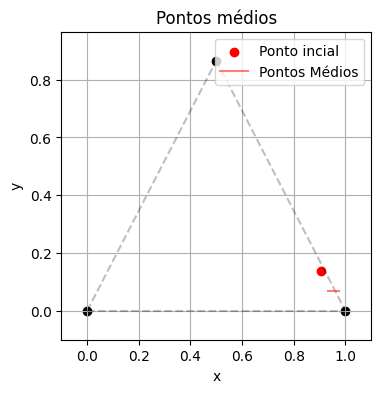

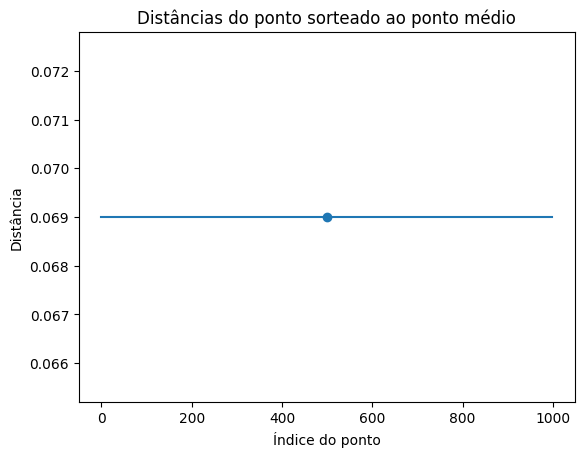

In [9]:
p = sorteia_ponto_inicial()
v = sorteia_vertice()
#v = (1/2, 3**(1/2)/2)

d, p_lista, d_lista = calcula_ponto_central(p, v, metr = metrica_maximo)

xpn = [m[0] for m in p_lista]
ypn = [m[1] for m in p_lista]

plt.figure(figsize = (4,4))
plota_triangulo()
plt.scatter(p[0], p[1], color = "red", label = "Ponto incial")
plt.plot(xpn, ypn, color = "red", alpha=0.5, label="Pontos Médios")
#plt.plot([p[0],v[0]], [v[1],p[1]], color="lightgreen")
plt.title("Pontos médios")
plt.xlabel("x"); plt.ylabel("y")
plt.xlim(-0.1,1.1); plt.ylim(-0.1, 3**(1/2)/2 + 0.1)
plt.legend(); plt.grid(); plt.show()

plt.plot([i for i in range(len(d_lista))], d_lista)
plt.scatter(len(d_lista)//2, d/2)
plt.title("Distâncias do ponto sorteado ao ponto médio")
plt.xlabel("Índice do ponto"); plt.ylabel("Distância");

Ponto inicial: (0.649, 0.397)
Distância inicial: 0.469
Ponto médio: (0.6481514921397294, 0.6315127018922193)
Distância média: 0.235


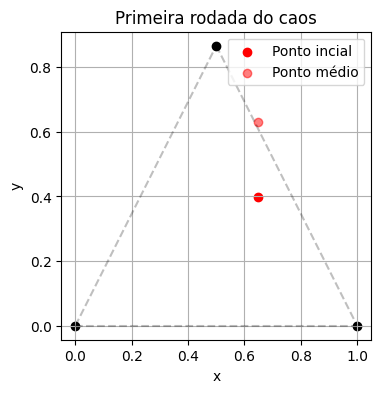

In [10]:
p = sorteia_ponto_inicial()
d, p_novo, d_novo = rodada_do_caos(p)

print(f"Ponto inicial: {p}")
print(f"Distância inicial: {d}")
print(f"Ponto médio: {p_novo}")
print(f"Distância média: {d_novo}")

plt.figure(figsize = (4,4))
plota_triangulo()
plt.scatter(p[0], p[1], color = "red", label = f"Ponto incial")
plt.scatter(p_novo[0], p_novo[1], color = "red", label = f"Ponto médio", alpha=0.5)
plt.title("Primeira rodada do caos")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.grid(); plt.show()

In [11]:
def jogo_do_caos(vertices = None, arestas = None, metr = metrica_euclidiana, n=10000):
    if vertices is None:
        v1 = (0,0)
        v2 = (1,0)
        v3 = (1/2, 3**(1/2)/2)
        vertices = [v1,v2,v3]
    
    if arestas is None:
        arestas = arestas_tri_eq(vertices)
    
    p = sorteia_ponto_inicial(arestas)
    pontos = [p]
    distancias = []
    for i in range(n):
        d, p_novo, d_novo = rodada_do_caos(p,vertices, metr = metr)
        if i == 0:
            distancias.append(d)
        pontos.append(p_novo)
        distancias.append(d_novo)
        p = p_novo
        
    return pontos, distancias

In [12]:
def plota_fractal_solido(pontos, vertices, arestas, subplots = None, figsize = (12,12), title = "Fractal gerado"):
                  
    px = [p[0] for p in pontos]  
    py = [p[1] for p in pontos]
                 
    if len(pontos) == 1: 
        plt.figure(figsize = figsize)
        plota_triangulo(vertices, arestas)
        plt.scatter(px[0], py[0], color = "red", label = r"$P_0$", s=10)
        plt.title("Ponto inicial")
        plt.xlabel("x"); plt.ylabel("y")
        plt.legend(); plt.grid(); plt.show()
        
    elif len(pontos) == 2:
        plt.figure(figsize = figsize)
        plota_triangulo(vertices=None, arestas = None)
        plt.scatter(px[0], py[0], color = "red", label = r"$P_0$", s=10)
        plt.scatter(px[1], py[1], color = "red", label = r"$P_1$", alpha = 0.5, s=10)
        plt.title(title)
        plt.xlabel("x"); plt.ylabel("y")
        plt.legend(); plt.grid(); plt.show()
        
    elif len(pontos) >= 3:
        if subplots is None:
            plt.figure(figsize = figsize)
            plt.scatter(px[2:], py[2:], color = "gray", alpha=0.5, s=0.1)
            plt.scatter(px[0], py[0], color = "red", label = r"$P_0$", s=10)
            plt.scatter(px[1], py[1], color = "red", label = r"$P_1$", alpha = 0.5, s=10)
            plota_triangulo(vertices=None, arestas = None)
            plt.title(title)
            plt.xlabel("x"); plt.ylabel("y")
            plt.legend(); plt.grid(); plt.show()

        else:
            fig, ax = plt.subplots(subplots[0], subplots[1], figsize=figsize)
            ax = ax.flatten()

            xlim_inf = -0.05
            xlim_sup = 1.05
            ylim_inf = -0.05
            ylim_sup = 3**(1/2)/2 + 0.05

            for i in range(len(ax)):
                plota_triangulo(vertices, arestas,ax=ax[i])
                ax[i].scatter(px[2:], py[2:], color = "gray", alpha=0.5, s=0.1)
                ax[i].scatter(px[0], py[0], color = "red", label = r"$P_0$", s=10)
                ax[i].scatter(px[1], py[1], color = "red", label = r"$P_1$", alpha = 0.5, s=10)
                ax[i].set_xlim(xlim_inf,xlim_sup);ax[i].set_ylim(ylim_inf,ylim_sup) 
                ax[i].set_title(title)
                ax[i].set_xlabel("x"); ax[i].set_ylabel("y")
                ax[i].legend(); ax[i].grid(); 

                xlim_inf *= 0.5
                xlim_sup *= 0.5
                ylim_inf *= 0.5
                ylim_sup *= 0.5

            plt.show()

        
def gera_fractal_solido(vertices=None, arestas = None, metr = metrica_euclidiana, n=10000, subplots = None, figsize = (12,12), title = "Fractal gerado"):
    pontos, distancias = jogo_do_caos(vertices, arestas, metr, n)
    plota_fractal_solido(pontos, vertices, arestas, subplots, figsize, title)
    
    return pontos, distancias

In [13]:
def plota_fractal_grad(pontos, vertices=None, arestas = None, subplots=None, figsize=(15,12), title="Fractal gerado"):
                  
    px = [p[0] for p in pontos]  
    py = [p[1] for p in pontos]
                 
    if len(pontos) == 1: 
        fig = plt.figure(figsize = figsize)
        plota_triangulo(vertices, arestas)
        plt.scatter(px[0], py[0], color = "red", label = r"$P_0$", s=10)
        plt.title("Ponto inicial")
        plt.xlabel("x"); plt.ylabel("y")
        plt.legend(); plt.grid(); plt.show()
        
    elif len(pontos) == 2:
        fig = plt.figure(figsize = figsize)
        plota_triangulo(vertices, arestas)
        plt.scatter(px[0], py[0], color = "red", label = r"$P_0$", s=10)
        plt.scatter(px[1], py[1], color = "red", label = r"$P_1$", alpha = 0.5, s=10)
        plt.title(title)
        plt.xlabel("x"); plt.ylabel("y")
        plt.legend(); plt.grid(); plt.show()
        
    elif len(pontos) >= 3:
        indices = np.arange(len(px) - 2)
        if subplots is None:
            fig = plt.figure(figsize = figsize)
            plt.scatter(px[2:], py[2:], color = "gray", alpha=0.5, s=0.1)
            plota_triangulo(vertices, arestas)
            sc = plt.scatter(px[2:], py[2:], c=indices, cmap="magma", s=0.1, alpha=0.5)
            plt.scatter(px[0], py[0], color = "red", label = r"$P_0$", s=10)
            plt.scatter(px[1], py[1], color = "red", label = r"$P_1$", alpha = 0.5, s=10)
            plt.title(title)
            plt.xlabel("x"); plt.ylabel("y")
            plt.legend(); plt.grid()

            # Colorbar fora da área do plot
            cax = plt.gcf().add_axes([0.92, 0.15, 0.02, 0.7])
            plt.colorbar(sc, cax=cax, label="Índice da iteração")
            plt.show()

        else:
            fig, ax = plt.subplots(subplots[0], subplots[1], figsize=figsize)
            ax = ax.flatten()

            xlim_inf = -0.05
            xlim_sup = 1.05
            ylim_inf = -0.05
            ylim_sup = 3**(1/2)/2 + 0.05

            for i in range(len(ax)):
                plota_triangulo(vertices, arestas, ax[i])
                sc = ax[i].scatter(px[2:], py[2:], c=indices, cmap="magma", s=0.1, alpha=0.5)
                sc_last = sc
                ax[i].scatter(px[0], py[0], color = "red", label = r"$P_0$", s=10)
                ax[i].scatter(px[1], py[1], color = "red", label = r"$P_1$", alpha = 0.5, s=10)
                ax[i].set_xlim(xlim_inf,xlim_sup);ax[i].set_ylim(ylim_inf,ylim_sup) 
                ax[i].set_title(title)
                ax[i].set_xlabel("x"); ax[i].set_ylabel("y")
                ax[i].legend(); ax[i].grid();

                xlim_inf *= 0.5
                xlim_sup *= 0.5
                ylim_inf *= 0.5
                ylim_sup *= 0.5

            # Colorbar fora da grade (não mexe no tamanho dos plots)
            fig.subplots_adjust(right=0.88)  # deixa espaço na lateral
            cax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
            fig.colorbar(sc_last, cax=cax, label="Índice da iteração")

            plt.show()
            
    return fig

def gera_fractal_grad(vertices=None, arestas = None, metr = metrica_euclidiana, n=10000, subplots = None, figsize = (12,12), title = "Fractal gerado"):
    pontos, distancias = jogo_do_caos(vertices, arestas, metr, n)
    plota_fractal_grad(pontos, vertices, arestas, subplots, figsize, title)
    
    return pontos, distancias

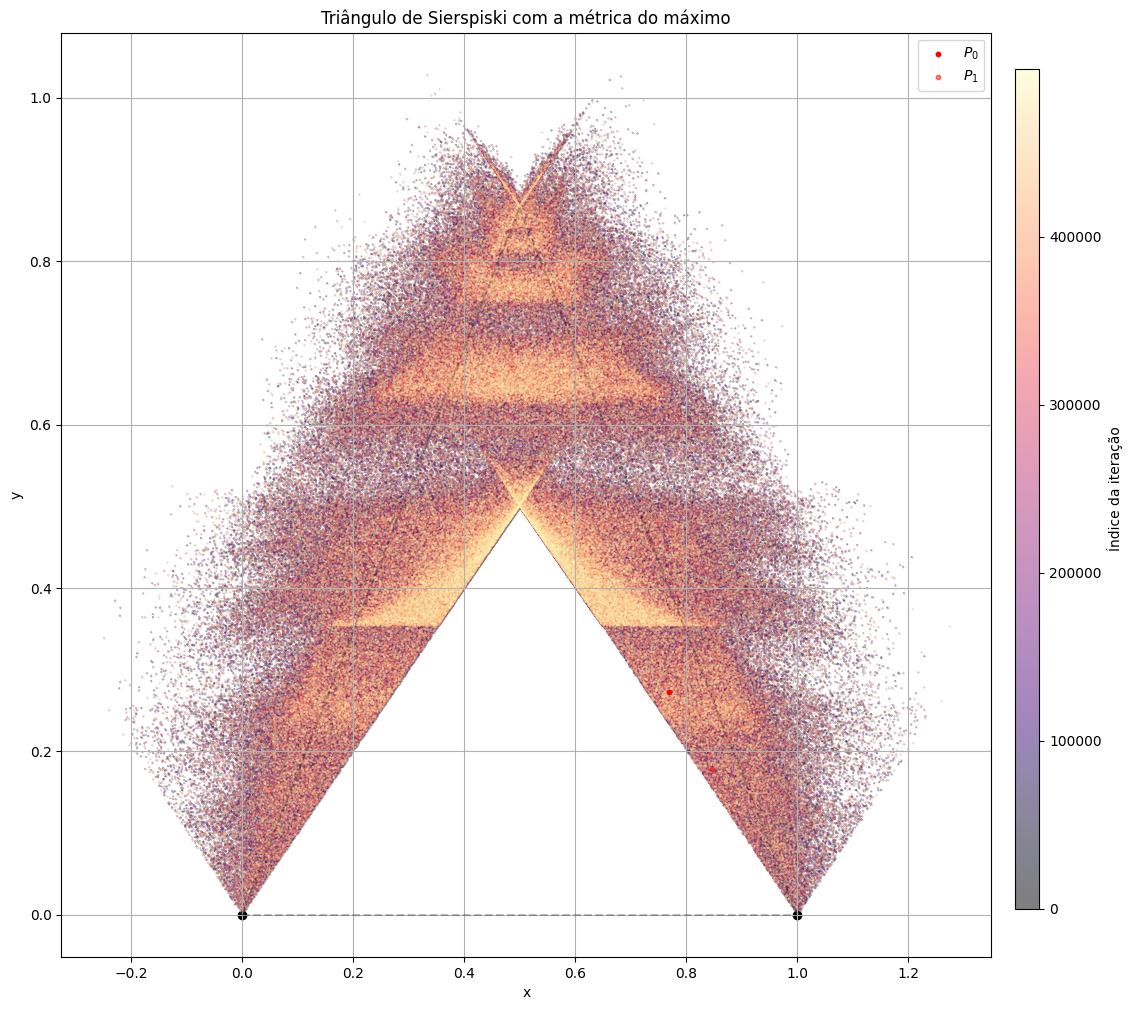

In [14]:
pontos, distancias = gera_fractal_grad(n=500000, title="Triângulo de Sierspiski com a métrica do máximo")